# Importing Libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
%matplotlib inline 
import math
import numpy as np  
import pandas as pd 

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [0]:
#from google.colab import drive
#drive.mount('/gdrive')

# Working on the data

In [4]:
df = pd.read_csv("ratings_Electronics.csv",header=None)

In [5]:
df.head()
df.tail()
df.shape
df.dtypes
df.info

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


,0,1,2,3
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824481,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


(7824482, 4)

0     object
1     object
2    float64
3      int64
dtype: object

<bound method DataFrame.info of                       0           1    2           3
0         AKM1MP6P0OYPR  0132793040  5.0  1365811200
1        A2CX7LUOHB2NDG  0321732944  5.0  1341100800
2        A2NWSAGRHCP8N5  0439886341  1.0  1367193600
3        A2WNBOD3WNDNKT  0439886341  3.0  1374451200
4        A1GI0U4ZRJA8WN  0439886341  1.0  1334707200
5        A1QGNMC6O1VW39  0511189877  5.0  1397433600
6        A3J3BRHTDRFJ2G  0511189877  2.0  1397433600
7        A2TY0BTJOTENPG  0511189877  5.0  1395878400
8        A34ATBPOK6HCHY  0511189877  5.0  1395532800
9         A89DO69P0XZ27  0511189877  5.0  1395446400
10        AZYNQZ94U6VDB  0511189877  5.0  1401321600
11       A1DA3W4GTFXP6O  0528881469  5.0  1405641600
12       A29LPQQDG7LD5J  0528881469  1.0  1352073600
13        AO94DHGC771SJ  0528881469  5.0  1370131200
14        AMO214LNFCEI4  0528881469  1.0  1290643200
15       A28B1G1MSJ6OO1  0528881469  4.0  1280016000
16       A3N7T0DY83Y4IG  0528881469  3.0  1283990400
17       A1H8P

In [6]:
df.columns = ["user_id","product_id","rating","timestamp"]

In [7]:
df.columns

Index(['user_id', 'product_id', 'rating', 'timestamp'], dtype='object')

In [8]:
df.isnull().values.any()
df.isnull().sum().sum()
df.isna().values.any()
df.isna().sum().sum()
df.describe()
df.describe().transpose()

False

0

False

0

,rating,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


,count,mean,std,min,25%,50%,75%,max
rating,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


In [9]:
df.drop(columns = "timestamp",inplace =True,axis =1)

In [10]:
df_users=df.groupby(['user_id']).count()

**Trying to sort the data based on the users who have rated more than 50 times**

In [11]:
(df_users.rating > 50).count()

4201696

In [16]:
final_df= df_users.loc[df_users["rating"]>=50]

In [17]:
final_df.head()

,product_id,rating
user_id,,
A100UD67AHFODS,116,116
A100WO06OQR8BQ,132,132
A105S56ODHGJEK,68,68
A105TOJ6LTVMBG,71,71
A10AFVU66A79Y1,65,65


In [18]:
final_df.shape

(1540, 2)

In [21]:
final_df.rating = final_df.rating.astype('int64') 


C:\Users\rajan\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Histogram of the Final data showing the ratings**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000194010093C8>]],
      dtype=object)

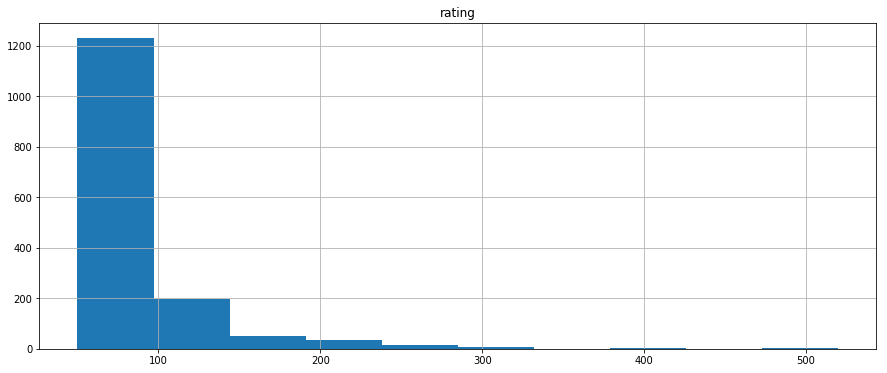

In [22]:
final_df.hist(column="rating",grid = True,figsize = (15,6))
plt.show()

**Train - Test Split **

In [23]:
X_train, X_test = train_test_split(final_df, test_size = 0.3, random_state = 1)

# Popularity Recommender model

**Top 5 Products based on the ratings of all data available.**

In [24]:
final_df.groupby(by='product_id')['rating'].mean().sort_values(ascending=False).head(5)

product_id
520    520
501    501
498    498
431    431
406    406
Name: rating, dtype: int64

**Trying to make a prediction based on Popularity**

In [25]:
train_rated=X_train.groupby(by='product_id')['rating'].mean().sort_values(ascending=False)

In [26]:
test_rated=X_test.groupby(by='product_id')['rating'].mean().sort_values(ascending=False)

In [27]:
train_rated=train_rated.reset_index(name = 'rating')

In [28]:
test_rated=test_rated.reset_index(name = 'rating')

In [29]:
rated_products = pd.merge(test_rated, train_rated, on='product_id', how='inner')

**RMSE Value of a Popularity Based Model**

In [37]:
print("RMSE value",np.sqrt(mean_squared_error(rated_products["rating_y"],rated_products["rating_x"])))

RMSE value 1.0987517295955944


# Collaborative Filtering model

In [38]:
!pip install surprise

In [39]:
final_df.shape

(125871, 3)

Converting Pandas Dataframe to Surpise format

In [45]:
final_df.user_id=final_df.user_id.astype(str)
final_df.product_id=final_df.product_id.astype(str)

from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(final_df[['user_id', 'product_id', 'rating']], reader)

from surprise.model_selection import train_test_split
train, test = train_test_split(data, test_size=.30,random_state=123)


from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

print('No of unique users:',len(final_df["user_id"].unique()))


No of unique users: 1540


In [46]:
print('No of unique products:',len(final_df["product_id"].unique()))

No of unique products: 48190


Since the no of unique users are lesser than the unique produsct, it is better to build to Used Based Collaborative Filter

**Grid Search Model**

In [49]:
from surprise.model_selection import GridSearchCV

param_grid = {'k': [1, 50],
              'sim_options': {'name': ['msd', 'cosine','pearson'],
                              'user_based': [True]}
             }

gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

Best Params were k=50 and name=pearson

**Model building using best params from Grid Search model**

In [50]:
model = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': True})
model.fit(train)
test_pred = model.test(test)

Computing the pearson similarity matrix...
Done computing similarity matrix.


**RMSE Score**

In [52]:
accuracy.rmse(test_pred)

RMSE: 1.0473


1.0472963586706814

In [53]:
test_pred
predictions = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])

[Prediction(uid='A22CW0ZHY3NJH8', iid='B005FDXZJU', r_ui=5.0, est=4.720331496101592, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='A7FDGFK0KN7QG', iid='B005058B6A', r_ui=5.0, est=4.666666666666667, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AMZCZBK1EF1PV', iid='B002C73WR2', r_ui=5.0, est=4.261051651931131, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A213J54E63SYOP', iid='B007JPOX8O', r_ui=4.0, est=3.838709677419355, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1H7Y5XKPGT0OS', iid='B005X64MN2', r_ui=5.0, est=4.15, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2X3L31KCXBHCL', iid='B00EOI2SYK', r_ui=5.0, est=4.298245614035087, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A34C9AFFZOI45T', iid='B003QA5LA0', r_ui=1.0, est=4.8352941176470585, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3D1TZH619NKHN', iid

In [55]:
predictions.head()

,0,1,2
0,A22CW0ZHY3NJH8,B005FDXZJU,4.720331
1,A7FDGFK0KN7QG,B005058B6A,4.666667
2,AMZCZBK1EF1PV,B002C73WR2,4.261052
3,A213J54E63SYOP,B007JPOX8O,3.838710
4,A1H7Y5XKPGT0OS,B005X64MN2,4.150000


In [59]:
final_df.user_id.sample()

51102    A3IOQ7NVVLAUEE
Name: user_id, dtype: object

Top 5 Recommendations for all users groups

In [62]:
top_5_recos = predictions.groupby("user_id").head(5).reset_index(drop=True)
top_5_recos

,user_id,product_id,est_rating
0,AZOK5STV85FBJ,B006MPRFJQ,4.756757
1,AZOK5STV85FBJ,B000O5N5AI,4.756757
2,AZOK5STV85FBJ,B00003006E,4.756757
3,AZOK5STV85FBJ,B0088LXTTM,4.756757
4,AZOK5STV85FBJ,B00B25P27S,4.756757
5,AZNUHQSHZHSUE,B000N99BBC,4.500345
6,AZNUHQSHZHSUE,B000FJEYZI,4.261052
7,AZNUHQSHZHSUE,B000X27U44,4.261052
8,AZNUHQSHZHSUE,B009M3PP7O,4.261052
9,AZNUHQSHZHSUE,B0032HI3HU,4.261052


In [68]:
top_five('A3IOQ7NVVLAUEE')

,user_id,product_id,est_rating
4374,A3IOQ7NVVLAUEE,B004577K7U,4.261052
4616,A3IOQ7NVVLAUEE,B0051SVVX6,4.261052
5490,A3IOQ7NVVLAUEE,B003RAMKNU,4.261052
6322,A3IOQ7NVVLAUEE,B00C99MUHQ,4.261052
6989,A3IOQ7NVVLAUEE,B00AK5YJFC,4.261052


The user AZOK5STV85FBJ average rating is the highest among all